In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
train_df = pd.read_csv("datasaham_baru.csv")

In [3]:
train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,1000.554016,1002.372009,994.531006,1000.877014,1000.847290,4584400.0
1,2005-01-04,1002.271973,1019.070984,1002.271973,1018.543030,1018.512756,16504000.0
2,2005-01-05,1016.406006,1025.383057,1013.366028,1015.431030,1015.400879,22712700.0
3,2005-01-06,1014.866028,1029.885986,1014.866028,1029.885986,1029.855347,20900900.0
4,2005-01-07,1034.302979,1038.823975,1028.343994,1032.525024,1032.494385,23479000.0


In [4]:
df = train_df.dropna()

In [5]:
data = df.drop(columns=['Date'])

In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,1000.554016,1002.372009,994.531006,1000.877014,1000.847290,4584400.0
1,1002.271973,1019.070984,1002.271973,1018.543030,1018.512756,16504000.0
2,1016.406006,1025.383057,1013.366028,1015.431030,1015.400879,22712700.0
3,1014.866028,1029.885986,1014.866028,1029.885986,1029.855347,20900900.0
4,1034.302979,1038.823975,1028.343994,1032.525024,1032.494385,23479000.0


In [7]:
data_close = df[['Close']]

In [8]:
df = (data-data.min()) / (data.max()-data.min())

In [9]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
0,0.003937,0.000000,0.007622,0.001072,0.001072,0.000468
1,0.004238,0.002934,0.008984,0.004175,0.004175,0.001686
2,0.006714,0.004043,0.010936,0.003628,0.003628,0.002320
3,0.006444,0.004835,0.011200,0.006167,0.006166,0.002135
4,0.009849,0.006405,0.013571,0.006630,0.006630,0.002399


In [10]:
train_x = df
train_y = df[['Close']] 

In [11]:
train_x.head()

,Open,High,Low,Close,Adj Close,Volume
0,0.003937,0.000000,0.007622,0.001072,0.001072,0.000468
1,0.004238,0.002934,0.008984,0.004175,0.004175,0.001686
2,0.006714,0.004043,0.010936,0.003628,0.003628,0.002320
3,0.006444,0.004835,0.011200,0.006167,0.006166,0.002135
4,0.009849,0.006405,0.013571,0.006630,0.006630,0.002399


In [12]:
train_y.head()

,Close
0,0.001072
1,0.004175
2,0.003628
3,0.006167
4,0.006630


In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.models import load_model

In [14]:
#membuat model
regressor = Sequential()

In [15]:
#get number of columns in training data
n_cols = train_x.shape[1]

In [16]:
#adding the input layer and the first hidden layer and drop our regularization
regressor.add(Dense(units = 500, kernel_initializer = 'uniform', activation = 'relu', input_shape=(n_cols,)))
regressor.add(Dropout(.2))

In [17]:
#adding the output layer
regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [18]:
#compiling the NN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
#fitting the NN to the training set
regressor.fit(train_x, train_y, validation_split=0.3, epochs =50)

Epoch 1/50
84/84 [==============================] - 1s 7ms/step - loss: 0.0394 - val_loss: 0.0015
Epoch 2/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 3/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/50
84/84 [==============================] - 0s 3ms/step - loss: 6.7958e-04 - val_loss: 0.0018
Epoch 5/50
84/84 [==============================] - 0s 3ms/step - loss: 4.3812e-04 - val_loss: 0.0022
Epoch 6/50
84/84 [==============================] - 0s 3ms/step - loss: 3.2868e-04 - val_loss: 0.0027
Epoch 7/50
84/84 [==============================] - 0s 3ms/step - loss: 2.5759e-04 - val_loss: 0.0038
Epoch 8/50
84/84 [==============================] - 0s 3ms/step - loss: 2.2080e-04 - val_loss: 0.0052
Epoch 9/50
84/84 [==============================] - 0s 3ms/step - loss: 1.9696e-04 - val_loss: 0.0064
Epoch 10/50
84/84 [==============================] - 0s 3ms/step - loss: 1.8143e-04 - val_loss

In [20]:
#save trained model
regressor.save('model.h5')

In [21]:
#read in data using pandas
test_df = pd.read_csv('datasaham.csv')

In [22]:
test_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,1000.554016,1002.372009,994.531006,1000.877014,1000.847290,4584400.0
1,2005-01-04,1002.271973,1019.070984,1002.271973,1018.543030,1018.512756,16504000.0
2,2005-01-05,1016.406006,1025.383057,1013.366028,1015.431030,1015.400879,22712700.0
3,2005-01-06,1014.866028,1029.885986,1014.866028,1029.885986,1029.855347,20900900.0
4,2005-01-07,1034.302979,1038.823975,1028.343994,1032.525024,1032.494385,23479000.0


In [23]:
#delete NaN
test_data = test_df.dropna()

In [24]:
#drop date
test_data = test_df.drop(columns=['Date'])
data_test_close = test_df[['Close']]

In [25]:
#normalization
nor = (test_data-test_data.min())/(test_data.max()-test_data.min())

In [26]:
#create a dataframe with all training data except the target columns
test_x = nor

In [27]:
#create a dataframe with only the target column
test_y = nor[['Close']]

In [28]:
import matplotlib.pyplot as plt

#load trained model
regressor = load_model('model.h5')

#predict and test the model
input_data = test_x.values
real_close_price = test_y.values

predicted_close_price = regressor.predict(input_data)

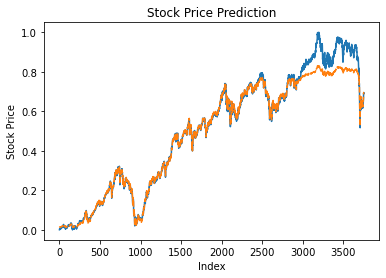

Mean Square Error:  0.000959823944969874


In [29]:
target = real_close_price[~np.isnan(real_close_price)]
predict = predicted_close_price[~np.isnan(real_close_price)]
plt.plot(target)
plt.plot(predict, '--')
plt.title('Stock Price Prediction')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.show()

def mse(predictions, targets):
    return 0.5 * (((predictions - targets) ** 2).mean())

#mse = ((real_close_price - predicted_close_price) ** 2).mean(axis=1)
print('Mean Square Error: ',mse(predict.flatten(),target.flatten()))